# Project.  다음 분기에 어떤 게임을 설계해야 할까?

In [ ]:
# 라이브러리 불러오기

import pandas as pd
import numpy as np
import scipy

import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

import warnings
warnings.filterwarnings("ignore")

## 1. 데이터 정제

In [ ]:
# 데이터 불러오기

df = pd.read_csv("/Users/kimjw/Desktop/AIB/n1xx_project1/vgames2.csv")
df.drop("Unnamed: 0", axis=1, inplace=True) # 필요없는 칼럼 삭제
df.head(4)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0


* Name : 게임의 이름입니다.
* Platform : 게임이 지원되는 플랫폼의 이름입니다.
* Year : 게임이 출시된 연도입니다.
* Genre : 게임의 장르입니다.
* Publisher : 게임을 제작한 회사입니다.
* NA_Sales : 북미지역에서의 출고량입니다.
* EU_Sales : 유럽지역에서의 출고량입니다.
* JP_Sales : 일본지역에서의 출고량입니다.
* Other_Sales : 기타지역에서의 출고량입니다.

In [ ]:
# 데이터프레임 크기 확인

df.shape

(16598, 9)

In [ ]:
# 중복되는 행 존재한다면 제거

df.drop_duplicates(inplace=True)
df.shape

(16597, 9)

* 데이터 값들이 중복되는 행은 1개 있었던 것으로 확인된다.

In [ ]:
# 결측치 확인

df.isnull().sum()

Name             0
Platform         0
Year           270
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

* Year, Genre, Publisher에서 결측치가 확인된다.

#### Year(년도)

In [ ]:
# Year 결측치 제거 <-- Year는 다른 외부데이터로부터 정보를 얻지 않는 한 다른 값으로 대체할 수 없다고 판단

df = df.dropna(subset=["Year"])
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
# 년도는 소수형이 아니므로 알아보기 쉽게 정수형으로 변환
df.Year = df.Year.astype(int)
# 연도의 고유한 값 출력
print(sorted(df.Year.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 86, 94, 95, 96, 97, 98, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2020]


In [ ]:
# 비디오 게임의 역사는 1950년대 초까지 거슬러 올라간다. (위키백과) --> 1950년 이후의 데이터라고 판단
# 데이터 형식 통일

def year_to_4digits(value):
    if value < 50:
        return 2000 + value
    elif value < 100:
        return 1900 + value
    else:
        return value

In [ ]:
df.Year = df.Year.apply(year_to_4digits)
print(sorted(df.Year.unique()))

[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2020]


#### Genre(장르)

In [ ]:
# Genre 고유한 값 확인

print(df.Genre.unique())

['Action' 'Adventure' 'Misc' 'Platform' 'Sports' 'Simulation' 'Racing'
 'Role-Playing' 'Puzzle' 'Strategy' 'Fighting' 'Shooter' nan]


* Genre라는 것은 작품의 성향을 반영해서 분류한 일종의 카테고리이다. 
* 전체적인 데이터를 봤을 때 Genre의 결측값을 다른 어떤 값으로 대체하기가 애매하다.
* 해당 결측값의 행들은 삭제하는 것으로 결정했다.

In [ ]:
# 결측값 삭제

df = df.dropna(subset=["Genre"])

#### Publisher(제작 회사)

In [ ]:
# Publisher 고유한 값 확인  --> "Unknown"이라는 값 존재

df.Publisher.unique()[:50]

array(['Destineer', 'Namco Bandai Games', 'Alchemist', 'Zoo Games',
       'D3Publisher', 'Konami Digital Entertainment', 'Deep Silver',
       'Tecmo Koei', 'Sega', 'THQ', 'Empire Interactive', 'Ubisoft',
       'Paradox Interactive', '505 Games', 'Tomy Corporation',
       'Eidos Interactive', 'Microsoft Game Studios',
       'Nippon Ichi Software', 'Kalypso Media', 'Electronic Arts',
       'Sony Computer Entertainment', 'Activision',
       'Tru Blu Entertainment', 'Warner Bros. Interactive Entertainment',
       'Midway Games', 'Mindscape', 'Wargaming.net', 'Capcom',
       'Acclaim Entertainment', 'Unknown', 'Nintendo',
       'Disney Interactive Studios', 'Crave Entertainment', 'Sunflowers',
       'Arc System Works', 'Milestone S.r.l', 'Kamui', 'Hudson Soft',
       'Square Enix', 'Focus Home Interactive', 'Take-Two Interactive',
       'Game Factory', 'Takara Tomy', 'SquareSoft', 'Global Star',
       'Infogrames', 'GT Interactive', 'Storm City Games',
       'Gathering of Dev

* "Unknown"은 Publisher 칼럼의 하나의 고유한 값이다.
* "Unknown"은 말그대로 제작회사를 알 수 없다는 뜻이다.
* 때문에 결측값을 "Unknwon" 값으로 대체하더라도 문제 없을 것이라 판단했다.

In [ ]:
# 결측값 "Unknown"으로 대체

df.Publisher.fillna("Unknown", inplace=True)

In [ ]:
df.isna().sum() # 결측값 처리 완료

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [ ]:
# 데이터 타입 확인

df.dtypes

Name           object
Platform       object
Year            int64
Genre          object
Publisher      object
NA_Sales       object
EU_Sales       object
JP_Sales       object
Other_Sales    object
dtype: object

* 출고량에 해당하는 NA_Sales, EU_Sales, JP_Sales, Other_Sales 칼럼은 숫자형이어야 하지만 문자형으로 확인된다.

#### NA_Sales, EU_Sales, JP_Sales, Other_Sales

In [ ]:
df.NA_Sales.unique()[:100]

array(['0.04', '0.17', '0', '0.12', '0.02', '0.07', '480K', '0.14',
       '0.01', '0.57', '0.06', '0.08', '0.48', '0.03', '0.05', '0.29',
       '0.19', '0.3', '0.26', '0.11', '0.18', '0.33', '0.51', '60K',
       '0.13', '0.34', '0.25', '0.41', '0.52', '0.22', '0.35', '0.1',
       '0.67', '0.59', '0.36', '0.21', '1.19', '5.91', '1.98', '0.09',
       '0K', '0.5', '0.94', '0.16', '0.63', '0.43', '0.2', '1.23', '0.44',
       '0.42', '0.97', '2.67', '0.28', '6.05', '0.47', '0.49', '0.62',
       '0.24', '0.72', '1.74', '0.46', '0.65', '0.32', '1.53', '0.23',
       '0.53', '0.37', '1.26', '0.39', '0.58', '1.94', '2.31', '1.03',
       '0.82', '0.4', '0.93', '0.56', '0.96', '1.64', '0.69', '1.25',
       '0.27', '0.92', '0.58M', '1.24', '0.25M', '0.86', '0.73', '0.55',
       '1.54', '1.02', '1.27', '0.54', '0.15', '1.09', '3.44', '2.29',
       '0.88', '5.55M', '1.37'], dtype=object)

* 문자형이었던 이유는 K, M이 포함되어 있기 때문이다.
* 이는 길이가 긴 숫자를 간략하게 표시하기 위한 방법으로 변환된 데이터이다.
* 분석을 위해선 숫자형 값들이 필요하기 위해 K -> 천, M -> 백만, None -> 백만의 단위 변환이 필요하다.

In [ ]:
# NA_Sales, EU_Sales, JP_Sales, Other_Sales 숫자형으로 바꿔주기

def text_to_float(value):
    if "K" in value:                        # K인 경우(천 단위)
        return float(value[:-1]) * 1000
    elif "M" in value:                      # M인 경우(백만 단위)
        return float(value[:-1]) * 1000000
    else:                                   # 아무런 단위 표시가 없는 경우(백만 단위)
        return float(value) * 1000000

In [ ]:
df.NA_Sales = df.NA_Sales.apply(text_to_float)
df.EU_Sales = df.EU_Sales.apply(text_to_float)
df.JP_Sales = df.JP_Sales.apply(text_to_float)
df.Other_Sales = df.Other_Sales.apply(text_to_float)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0


## Feature Engineering

In [ ]:
# 출고량의 총합을 나타내는 칼럼 추가

df["Total_Sales"] = df["NA_Sales"] + df["EU_Sales"] + df["JP_Sales"] + df["Other_Sales"]
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000.0,0.0,0.0,0.0,40000.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0,180000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20000.0,0.0,20000.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000.0,0.0,0.0,0.0,40000.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0,250000.0


## 데이터 분석 및 시각화

### 연도별 게임 출고량에 트렌드가 존재하는가?

In [ ]:
# 데이터 그룹화

df = df.sort_values(by=["Year"]) # 년도 기준으로 오름차순

df_year_group = df.groupby("Year").sum().reset_index()

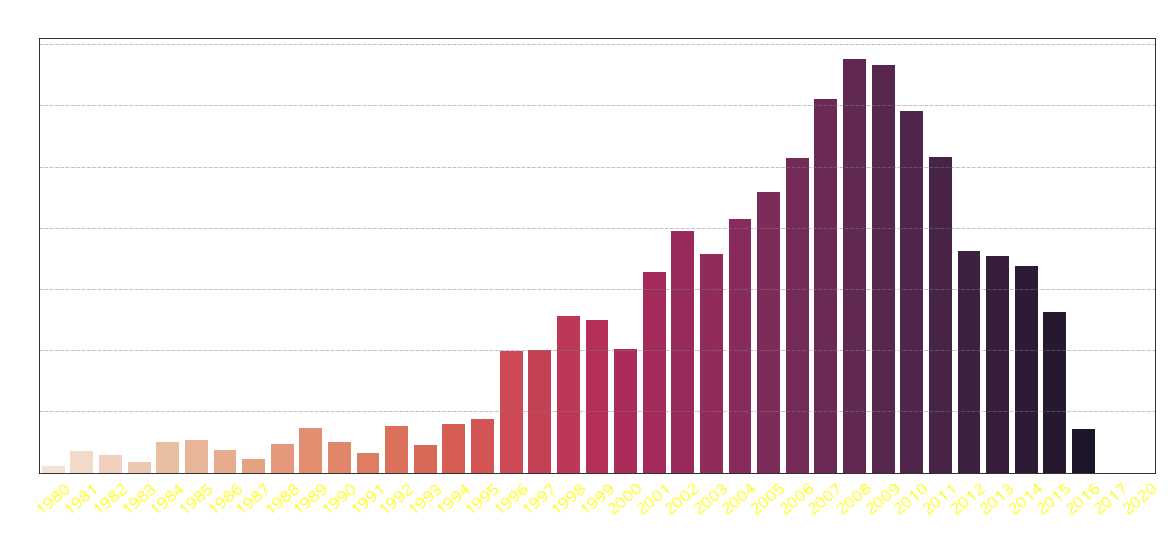

In [ ]:
fig,ax = plt.subplots(figsize=(20,8))

bar = sns.barplot(df_year_group.Year, df_year_group.Total_Sales,
            palette="rocket_r")
ax.yaxis.grid(linewidth=0.5, color="grey", linestyle="-.")
ax.set_title("연도별 출시한 게임 출고량 현황", fontsize=20, weight="bold",loc="center",pad=15)
ax.set_xlabel("Published Year", weight="bold", size=15)
ax.set_ylabel("Total_Sales", weight="bold", size=15)
bar.set_xticklabels(bar.get_xmajorticklabels(), fontsize = 15, color="yellow")
plt.xticks(rotation=40)
plt.show();

* 연도별 출시한 게임 출고량 현황 살펴봤을 때, 1996년에 전년도 대비 게임 출고량이 2배이상 상승했고, 그 이후 계속해서 증가하는 추세를 보이다가 2008,9년에 정점을 찍고나서 점차 하락하는 추세이다.
* 출고량이 많았다는 것은 그만큼 게임 수요가 많았다는 것으로 이해할 수 있다.
* 이를 바탕으로 2000년대 초,중반엔 게임 시장이 활발했지만, 점차 시장이 위축되고 있음을 추론할 수 있다.
* 이런 상황에서 게임 출시를 앞두고 있기 때문에, 우리는 `최근` 게임 데이터 동향 분석이 굉장히 중요하다.

In [ ]:
# 최근 데이터의 기준은?

df.tail(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
13777,NHL 17,XOne,2016,Sports,Electronic Arts,130000.0,10000.0,0.0,20000.0,160000.0
8557,No Man's Sky,PS4,2016,Action,Hello Games,580000.0,740000.0,20000.0,260000.0,1600000.0
11424,Zero Escape: Zero Time Dilemma,PSV,2016,Adventure,Aksys Games,30000.0,0.0,20000.0,10000.0,60000.0
3518,Battleborn,PS4,2016,Shooter,Take-Two Interactive,90000.0,80000.0,10000.0,40000.0,220000.0
2469,Ratchet & Clank (2016),PS4,2016,Platform,Sony Computer Entertainment,320000.0,640000.0,40000.0,180000.0,1180000.0
13771,Lego Star Wars: The Force Awakens,XOne,2016,Action,Warner Bros. Interactive Entertainment,120000.0,100000.0,0.0,20000.0,240000.0
5310,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.0,0.0,10000.0,0.0,10000.0
15233,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.0,0.0,10000.0,0.0,10000.0
10107,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.0,0.0,30000.0,0.0,30000.0
6906,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,270000.0,0.0,0.0,20000.0,290000.0


* 최근 데이터의 기준을 몇 년의 기간으로 할 것이냐에 대해 보통은 3년 또는 5년으로 많이 두는데, 우리가 가진 데이터는 위에서 보이듯 2017년 이후 데이터가 4개밖에 존재하지 않는다.
* 때문에 최근 데이터 기준을 조금 더 늘려서 7년, 즉 2014년부터의 데이터로 설정한다.

In [ ]:
# 최근 데이터 - 2014년부터의 기간 데이터

df_recent = df[df["Year"] >= 2014]
df_recent

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
9029,Skylanders: Trap Team,WiiU,2014,Action,Activision,390000.0,250000.0,0.0,60000.0,700000.0
9314,Adventure Time: The Secret of the Nameless,X360,2014,Adventure,Little Orbit,10000.0,0.0,0.0,0.0,10000.0
8859,Watch Dogs,XOne,2014,Action,Ubisoft,900000.0,530000.0,0.0,130000.0,1560000.0
17,Hajime no Ippo: The Fighting! (2014),PS3,2014,Sports,Namco Bandai Games,0.0,0.0,30000.0,0.0,30000.0
68,Sherlock Holmes: Crimes & Punishments,PS4,2014,Adventure,Focus Home Interactive,80000.0,140000.0,0.0,50000.0,270000.0
...,...,...,...,...,...,...,...,...,...,...
13771,Lego Star Wars: The Force Awakens,XOne,2016,Action,Warner Bros. Interactive Entertainment,120000.0,100000.0,0.0,20000.0,240000.0
5310,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.0,0.0,10000.0,0.0,10000.0
15233,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.0,0.0,10000.0,0.0,10000.0
10107,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.0,0.0,30000.0,0.0,30000.0


### 국가별 출고량 변수 간 상관정도

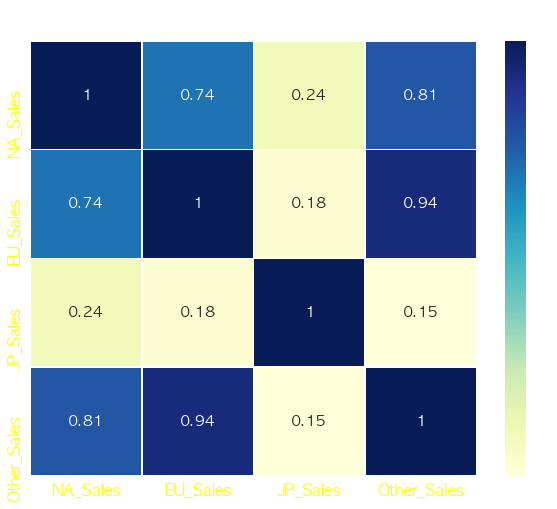

In [ ]:
# 데이터 간의 상관정도(두 변수가 얼마나 연관되어 있는지를 나타내는 지표) 확인
fig, ax = plt.subplots(figsize=(10,8))

haeat = sns.heatmap(df_recent[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].corr(), annot=True, annot_kws={"size": 15}, 
            cmap="YlGnBu", linewidths=0.5, ax=ax)
ax.set_title("2014년 이후 국가별 출고량 변수 간 상관정도", fontsize=18, weight="bold",loc="center",pad=20)
haeat.set_xticklabels(haeat.get_xmajorticklabels(), color="yellow", fontsize=16)
haeat.set_yticklabels(haeat.get_ymajorticklabels(), color="yellow", fontsize=16)

plt.show();

* 파란색으로 갈수록 변수 간 연관성이 높은 것
* 출고량 변수 간 상관관계표를 살펴봤을 때, 일본에서의 출고량을 제외하고 나머지 국가의 출고량 간의 상관정도는 꽤 높은 것으로 나왔다.
* 이를 토대로 일본을 제외한 북미, 유럽, 그리고 기타지역에서의 출고량 분포는 비슷하게 나올 것으로 예측된다.

### 장르별 게임 출고량

In [ ]:
df_recent_genre_group = df.groupby("Genre").sum().reset_index().drop(["Year"], axis=1)
df_genre_group = df_recent.groupby("Genre").sum().reset_index().drop(["Year"], axis=1)

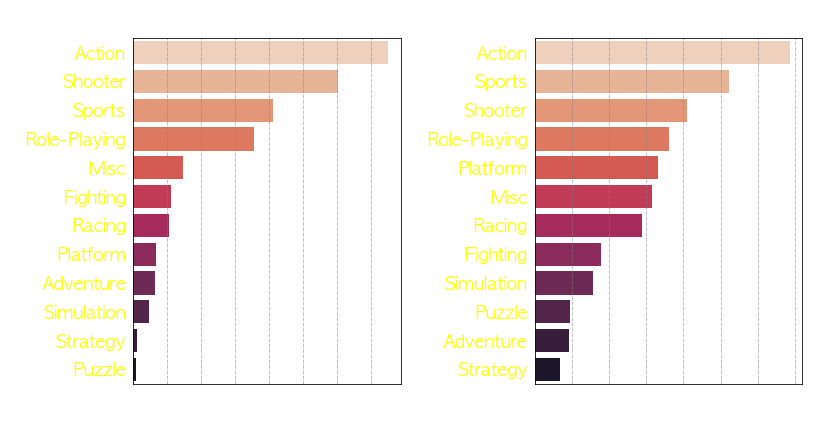

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6), constrained_layout=True)

bar1 = sns.barplot(x=df_genre_group.sort_values(by=["Total_Sales"], ascending=False).Total_Sales,
            y=df_genre_group.sort_values(by=["Total_Sales"], ascending=False).Genre, 
            palette="rocket_r", ax=ax1)
ax1.xaxis.grid(linewidth=0.5, color="grey", linestyle="-.")
ax1.set_title("장르별 게임 출고량", fontsize=20, weight="bold",loc="center",pad=15)
ax1.set_xlabel("Total_Sales", weight="bold", size=15)
ax1.set_ylabel("Genre", weight="bold", size=15)
bar1.set_yticklabels(bar1.get_ymajorticklabels(), fontsize = 18, color="yellow")

bar2 = sns.barplot(x=df_recent_genre_group.sort_values(by=["Total_Sales"], ascending=False).Total_Sales,
            y=df_recent_genre_group.sort_values(by=["Total_Sales"], ascending=False).Genre, 
            palette="rocket_r", ax=ax2)
ax2.xaxis.grid(linewidth=0.5, color="grey", linestyle="-.")
ax2.set_title("2014년 이후 장르별 게임 출고량", fontsize=20, weight="bold",loc="center",pad=15)
ax2.set_xlabel("Total_Sales", weight="bold", size=15)
ax2.set_ylabel("")
bar2.set_yticklabels(bar2.get_ymajorticklabels(), fontsize = 18, color="yellow")

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.5)
plt.show();

* 전체 데이터 : Action - Shooter - Sports - Role-Playing 순서로 상위랭크
* 최근 데이터 : Action - Sports - Shooter - Role-Playing의 순서로 상위랭크
* 약간의 순위변동만 있을 뿐, 상위에 랭크되는 장르는 변함이 없다. ->  다음에 출시하게 될 장르는 이 중 하나가되지 않을까
* Action은 여전히 최근까지도 출고량이 가장 높은 장르이다. 
* Sports장르가 최근들어 부상하고 있다.

### 지역별로 선호하는 장르는? (지역 : 북미, 유럽, 일본, 기타지역)

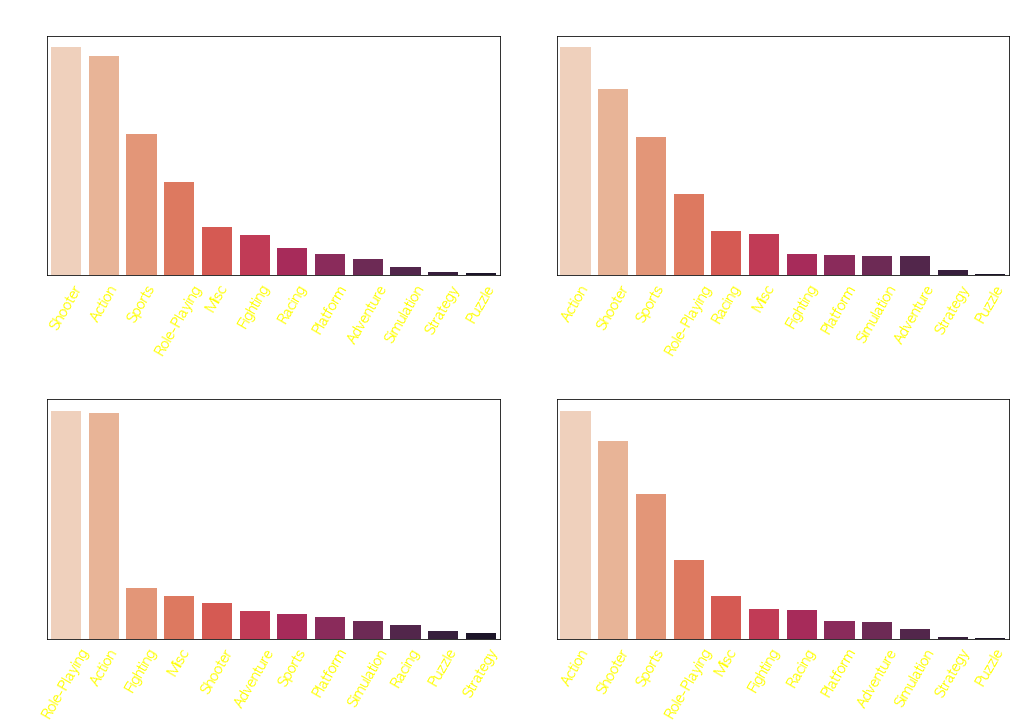

In [ ]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(14,10), constrained_layout=True)

bar1 = sns.barplot(ax = ax1, x=df_genre_group.sort_values(by=["NA_Sales"], ascending=False).Genre, y=df_genre_group.sort_values(by=["NA_Sales"], ascending=False).NA_Sales,
           palette="rocket_r")
ax1.set_title("2014년 이후 북미에서의 장르별 게임 출고량", fontsize=18, weight="bold",loc="center",pad=15)
ax1.set_xlabel("")
bar1.set_xticklabels(bar1.get_xmajorticklabels(), fontsize=14, color="yellow")

bar2 = sns.barplot(ax = ax2, x=df_genre_group.sort_values(by=["EU_Sales"], ascending=False).Genre, y=df_genre_group.sort_values(by=["EU_Sales"], ascending=False).EU_Sales,
           palette="rocket_r")
ax2.set_title("2014년 이후 유럽에서의 장르별 게임 출고량", fontsize=18, weight="bold",loc="center",pad=15)
ax2.set_xlabel("")
bar2.set_xticklabels(bar2.get_xmajorticklabels(), fontsize=14, color="yellow")

bar3 = sns.barplot(ax = ax3, x=df_genre_group.sort_values(by=["JP_Sales"], ascending=False).Genre, y=df_genre_group.sort_values(by=["JP_Sales"], ascending=False).JP_Sales,
           palette="rocket_r")
ax3.set_title("2014년 이후 일본에서의 장르별 게임 출고량", fontsize=18, weight="bold",loc="center",pad=15)
ax3.set_xlabel("")
bar3.set_xticklabels(bar3.get_xmajorticklabels(), fontsize=14, color="yellow")

bar4 = sns.barplot(ax = ax4, x=df_genre_group.sort_values(by=["Other_Sales"], ascending=False).Genre, y=df_genre_group.sort_values(by=["Other_Sales"], ascending=False).Other_Sales,
           palette="rocket_r")
ax4.set_title("2014년 이후 기타지역에서의 장르별 게임 출고량", fontsize=18, weight="bold",loc="center",pad=15)
ax4.set_xlabel("")
bar4.set_xticklabels(bar4.get_xmajorticklabels(), fontsize=14, color="yellow")

for ax in fig.axes:
    ax.tick_params(labelrotation=60)

plt.show();

* 북미 : Shooter - Action - Sports - Role-Playing
* 유럽 : Action - Shooter - Sports - Role-Playing
* 일본 : Role-Playing - Action - Fighting - Misc
* 기타지역 : Action - Shooter - Sports - Role-Playing
* 위의 상관분석에서 추론했듯이 일본을 제외한 다른 국가들의 출고량 분포는 비슷하다.

### 국가별 출고량 비중

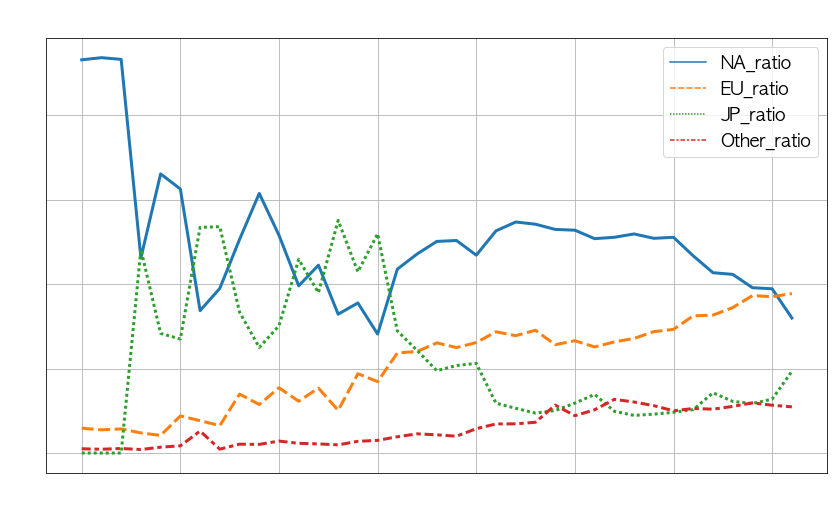

In [ ]:
# 북미, 유럽, 일본, 기타지역은 총 출고량의 어느 정도를 차지하는가?

df_year_group_ratio = df_year_group.copy()
df_year_group_ratio = df_year_group_ratio.iloc[:37] # 2016이후 자료는 거의 없기 때문에 2016년도까지의 데이터에서 확인
df_year_group_ratio["NA_ratio"] = df_year_group_ratio["NA_Sales"] / df_year_group_ratio["Total_Sales"]
df_year_group_ratio["EU_ratio"] = df_year_group_ratio["EU_Sales"] / df_year_group_ratio["Total_Sales"]
df_year_group_ratio["JP_ratio"] = df_year_group_ratio["JP_Sales"] / df_year_group_ratio["Total_Sales"]
df_year_group_ratio["Other_ratio"] = df_year_group_ratio["Other_Sales"] / df_year_group_ratio["Total_Sales"]

df_ratio_year = pd.melt(df_year_group_ratio[["Year","NA_ratio","EU_ratio","JP_ratio","Other_ratio"]], ["Year"],
                        var_name="Nation", value_name="Ratio")

plt.figure(figsize=(14,8))
sns.lineplot(x = "Year", y = "Ratio", data = df_ratio_year, hue = "Nation", style="Nation", linewidth=3)
plt.title("연도별 국가 출고량 비중", fontsize=20, weight="bold",loc="center", pad=15)
plt.grid()
plt.legend(fontsize=18, labelcolor="black")
plt.show();

* 최근들어 북미시장은 하락하는 추세이고, 유럽시장은 꾸준하게 성장하는 추세이다.
* 일본 및 기타지역은 상대적으로 낮은 비중을 차지하고 있기 때문에 북미와 유럽지역에서 선호하는 장르의 게임을 출고하는 것이 바람직해 보인다.
* 두 지역에서 선호하는 게임 장르는 Shooter와 Action 장르이다. 
* 북미지역에서 선호도 1위가 Shooter이지만 2위인 Action과 큰 차이가 없고, 유럽지역에서의 선호도 1위가 Action 장르이기 때문에 종합적으로 고려했을 때, 다음 분기에 Action 장르의 게임을 출고하면 좋지 않을까라고 생각한다.
* 이를 뒷받침하기 위해 통계적 가설검정을 실시

#### Action 장르의 게임 평균 출고량이 더 높을까?
* 귀무가설 : Action 장르의 게임 평균 출고량이 Shooter 장르의 게임 평균 출고량과 같거나 낮다
* 대립가설 : Action 장르의 게임 평균 출고량이 Shooter 장르의 게임 평균 출고량보다 높다
* 신뢰도 : 95%

In [ ]:
action_group_total = df_recent[df_recent["Genre"]=="Action"]["Total_Sales"]
shooter_group_total = df_recent[df_recent["Genre"]=="Shooter"]["Total_Sales"]

pvalue = scipy.stats.ttest_ind(action_group_total, shooter_group_total).pvalue / 2

if pvalue < 0.05:
    print("귀무가설 기각 -> Action 장르의 게임 평균 출고량이 Shooter 장르의 게임 평균 출고량보다 높다")
else:
    print("귀무가설 기각할 수 없다 -> Action 장르의 게임 평균 출고량이 Shooter 장르의 게임 평균 출고량과 같거나 낮다")

귀무가설 기각 -> Action 장르의 게임 평균 출고량이 Shooter 장르의 게임 평균 출고량보다 높다


* 가설검정결과, Action 장르의 게임 평균 출고량이 Shooter 장르의 게임 평균 출고량보다 높은 것을 알 수 있다.
* 이를 근거로 다음 분기에 Action 장르의 게임을 설계해야 한다는 결론을 도출할 수 있다.
* 그리고 성장세 측면에서 유럽시장이 북미시장을 따라잡고 있기 때문에, 다음 분기에 유럽 시장을 타겟팅하는 것도 좋은 시도이다.

### 어떤 플랫폼을 통해서?

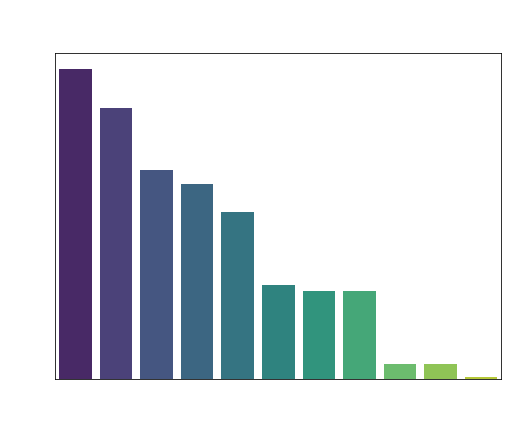

In [ ]:
action_platform = df_recent[df_recent["Genre"]=="Action"]
action_platform = action_platform.groupby("Platform").size().reset_index(name="count").sort_values(by=["count"],ascending=False)

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x="Platform", y="count", data=action_platform, palette="viridis")
ax.set_title("2014년 이후 플랫폼별 Action 게임 출시현황", fontsize=20, weight="bold",loc="center",pad=30)
ax.set_xlabel("Platform", weight="bold", size=15)
ax.set_ylabel("Count", weight="bold", size=15)
ax.tick_params(labelsize=12,length=2)
plt.show();

* 최근 Action 장르를 지원하는 플랫폼 중에서 가장 높은 비중을 차지하는 플랫폼은 PS4이다.

#### PS4에서 출시하는 게임 장르 비중

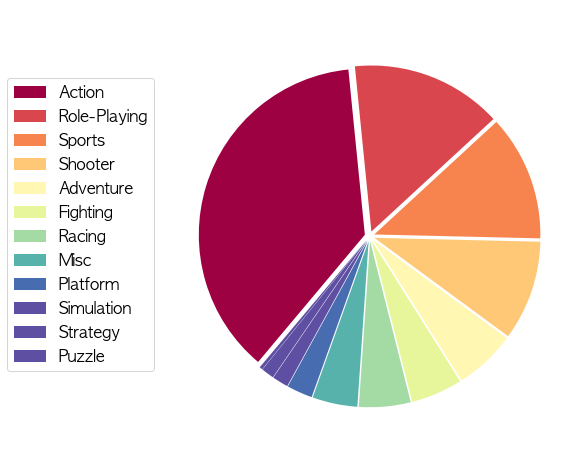

In [ ]:
ps4_genre = df_recent[df_recent["Platform"]=="PS4"].groupby("Genre").size().reset_index(name="count")
ps4_genre["ratio"] = ps4_genre["count"] / ps4_genre["count"].sum()
ps4_genre = ps4_genre.sort_values(by=["ratio"], ascending=False)

ratio = ps4_genre["ratio"]
labels = ps4_genre["Genre"]
explode = [0.03] * len(labels)
cmap = plt.cm.Spectral
colors = cmap(np.linspace(0, 1.3, len(labels)))

fig, ax = plt.subplots(figsize=(8,8), constrained_layout=True)
ax.pie(ratio, startangle=230, counterclock=False, explode=explode, colors=colors)
ax.set_title("2014년 이후 PS4가 출시하는 게임 장르 비중", fontsize=20, weight="bold",loc="center")

plt.legend(labels, fontsize=16, bbox_to_anchor=(0, 0.9), labelcolor="black")
plt.show();

* PS4 플랫폼에서 출시한 게임 중 Action 장르의 비중이 가장 높다.
* Action 게임에 많은 공을 들이고, 나름의 전문적인 사양으로 게임을 지원하는 것으로 판단된다
* Action 장르의 게임을 출시할 때 PS4 플랫폼을 활용하면 된다.

### 어느 제작회사를 통해서?

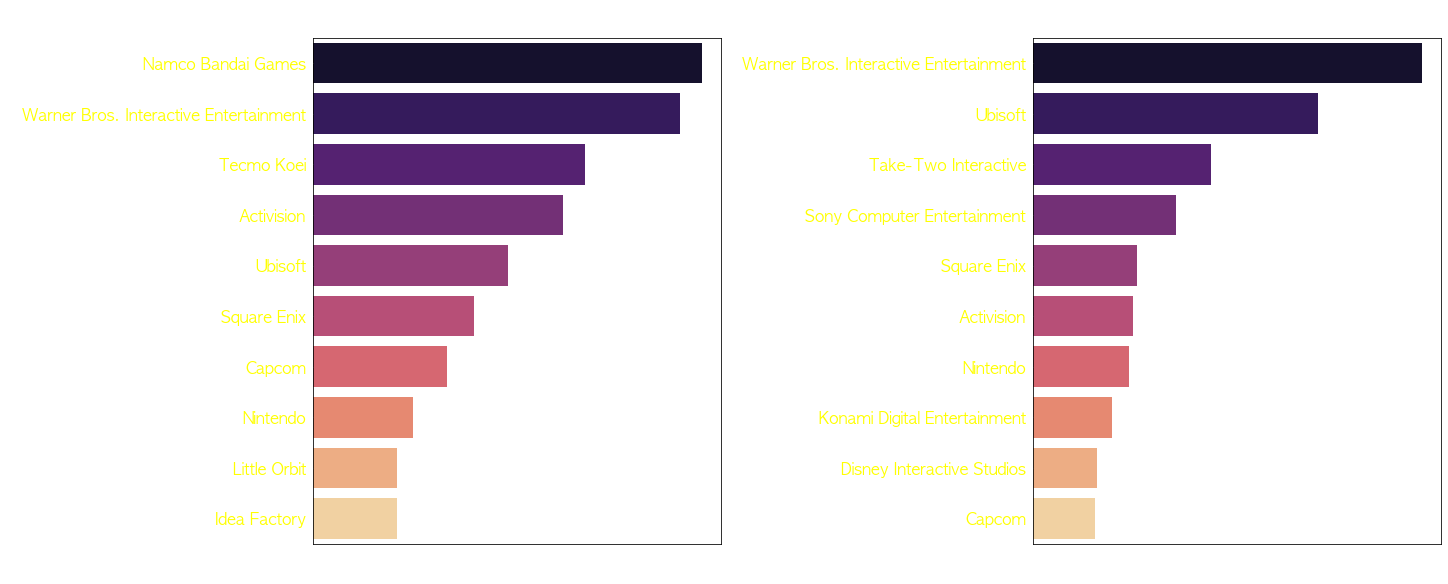

In [ ]:
# 제작회사별로 출시한 Action 장르 게임 개수 (Top10)
publisher_action_count = df_recent[df_recent.Genre=="Action"].groupby(["Publisher"]).size().reset_index(name="count").sort_values(by=["count"], ascending=False).head(10)
# 제작회사별로 출시한 Action 장르 게임 출고량 (Top10)
publisher_action_sales = df_recent[df_recent.Genre=="Action"].groupby(["Publisher"])["Total_Sales"].sum().reset_index(name="sales").sort_values(by=["sales"], ascending=False).head(10)

fig,(ax1,ax2) = plt.subplots(1,2, figsize=(20,8), constrained_layout=True)
bar1 = sns.barplot(x="count", y="Publisher", data=publisher_action_count, orient = 'h',
            palette="magma", ax=ax1)
ax1.set_title("제작회사별 출시한 Action 게임의 수", weight="bold", fontsize=20, pad=15)
bar1.set_yticklabels(bar1.get_ymajorticklabels(), fontsize = 16, color="yellow")

bar2 = sns.barplot(x="sales", y="Publisher", data=publisher_action_sales, orient = 'h',
            palette="magma", ax=ax2)
ax2.set_title("제작회사별 출시한 Action 게임의 출고량", weight="bold", fontsize=20, pad=15)
bar2.set_yticklabels(bar2.get_ymajorticklabels(), fontsize = 16, color="yellow")
ax2.set_ylabel("")

plt.show();

* Action 게임을 가장 많이 출시한 제작회사는 Namco Bandai Games이고 다음으로 Warner Bros. Interactive Entertainment이다.
* 그런데 Action 게임 출고량을 살펴보면 Warner Bros. Interactive Entertainment가 가장 높다.
* 이는 Warner Bros.사가 비록 Namco Bandai Games사보다 출시한 게임은 적지만 출고량은 더 많음, 즉 더 인기가 좋은 게임을 만들어냈다는 뜻으로 이해할 수 있다.
* 때문에 우리는 Warner Bros. Interactive Entertainment와 손을 잡고 게임을 출고하는 것이 바람직하다.

#### Warner Bros. Interactive Entertainment에서 출고하는 플랫폼 및 장르 비중

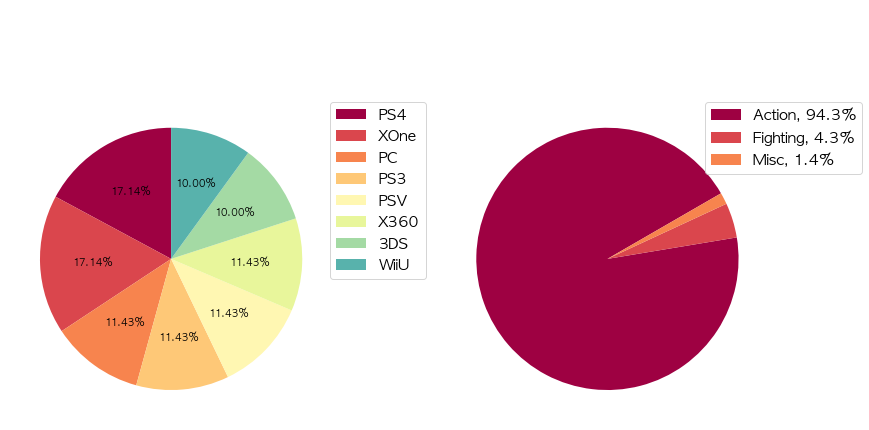

In [ ]:
# Warner Bros.사에서 플랫폼별 비중 구하기
warner_platform = df_recent[df_recent["Publisher"]=="Warner Bros. Interactive Entertainment"].groupby(["Platform"]).size().reset_index(name="count").sort_values(by=["count"], ascending=False)
warner_platform["ratio"] = warner_platform["count"]/warner_platform["count"].sum()
# Warner Bros.사에서 출고 게임 장르 비중 구하기
warner_genre = df_recent[df_recent["Publisher"]=="Warner Bros. Interactive Entertainment"].groupby(["Genre"]).size().reset_index(name="count").sort_values(by=["count"], ascending=False)
warner_genre["ratio"] = warner_genre["count"]/warner_genre["count"].sum()

labels1 = warner_platform["Platform"]
labels2 = warner_genre["Genre"]
cmap = plt.cm.Spectral
colors = cmap(np.linspace(0, 1.3, len(labels)))

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,10), constrained_layout=True)
ax1.pie(warner_platform["ratio"], autopct="%.2f%%", startangle=90, counterclock=True,
        textprops={'fontsize': 10, 'color': "black"}, colors=colors)
ax1.set_title("출고 플랫폼 비중", fontsize=15, weight="bold",loc="center")

ax2.pie(warner_genre["ratio"], startangle=30, counterclock=True, colors=colors)
ax2.set_title("출고 장르 비중", fontsize=15, weight="bold",loc="center")

fig.suptitle("Warner Bro. Interactive Entertainment", fontsize=20, y=0.85)
ax1.legend(labels1, fontsize=15, bbox_to_anchor=(1.3, 1), loc="upper right", labelcolor="black")
ax2.legend(["%s, %.1f%%" %(l,v) for (l,v) in zip(labels2, warner_genre["ratio"]*100)],
           fontsize=15, bbox_to_anchor=(1.3, 1), loc="upper right", labelcolor="black")
plt.show();

* Warner Bro. Interactive Entertainment사는 다양한 플랫폼을 고르게 사용한다(그중에서 우리가 필요로하는 플랫폼인 PS4는 1등)
* 대부분 Action 장르의 게임을 출고한다(94% 이상) -> Action 장르에 대한 전문성이 기대됨

## 분석 결과

* 장르 : Action
* 제작회사 : Warner Bros. Interactive Entertainment
* 플랫폼 : PS4
* 출고지역 : 유럽지역